       z     H  sigma_H
0  0.070  69.0     19.6
1  0.090  69.0     12.0
2  0.120  68.6     26.2
3  0.170  83.0      8.0
4  0.179  75.0      4.0
LR RMSE: 13.48431418098057
RF RMSE: 17.53425400262504


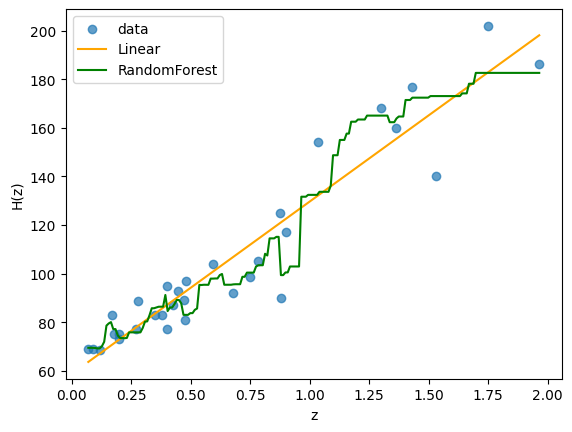

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1) بارگذاری داده با جداکننده فاصله
url = 'https://raw.githubusercontent.com/Ahmadmehrabi/Cosmic_chronometer_data/main/HzTable_MM_BC32.txt'
df = pd.read_csv(url, sep=r'\s+', comment='#', header=None, names=['z', 'H', 'sigma_H'])

print(df.head())

# 2) تقسیم داده‌ها
z = df['z'].values.reshape(-1, 1)
H = df['H'].values

X_train, X_test, y_train, y_test = train_test_split(z, H, test_size=0.2, random_state=42)

# 3) Linear regression baseline
lr = LinearRegression().fit(X_train, y_train)
y_lr = lr.predict(X_test)
print("LR RMSE:", np.sqrt(mean_squared_error(y_test, y_lr)))

# 4) Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_rf = rf.predict(X_test)
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_rf)))

# 5) رسم
zgrid = np.linspace(df['z'].min(), df['z'].max(), 200).reshape(-1, 1)
plt.scatter(df['z'], df['H'], label='data', alpha=0.7)
plt.plot(zgrid, lr.predict(zgrid), label='Linear', color='orange')
plt.plot(zgrid, rf.predict(zgrid), label='RandomForest', color='green')
plt.xlabel('z')
plt.ylabel('H(z)')
plt.legend()
plt.show()
